In [38]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load e formatação dos dados

In [39]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['especie'] = iris.target
df['especie'] = df['especie'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

Relaçoes de dispersão das especies pela largura e comprimento das sépalas bem como largura e comprimento das pétalas

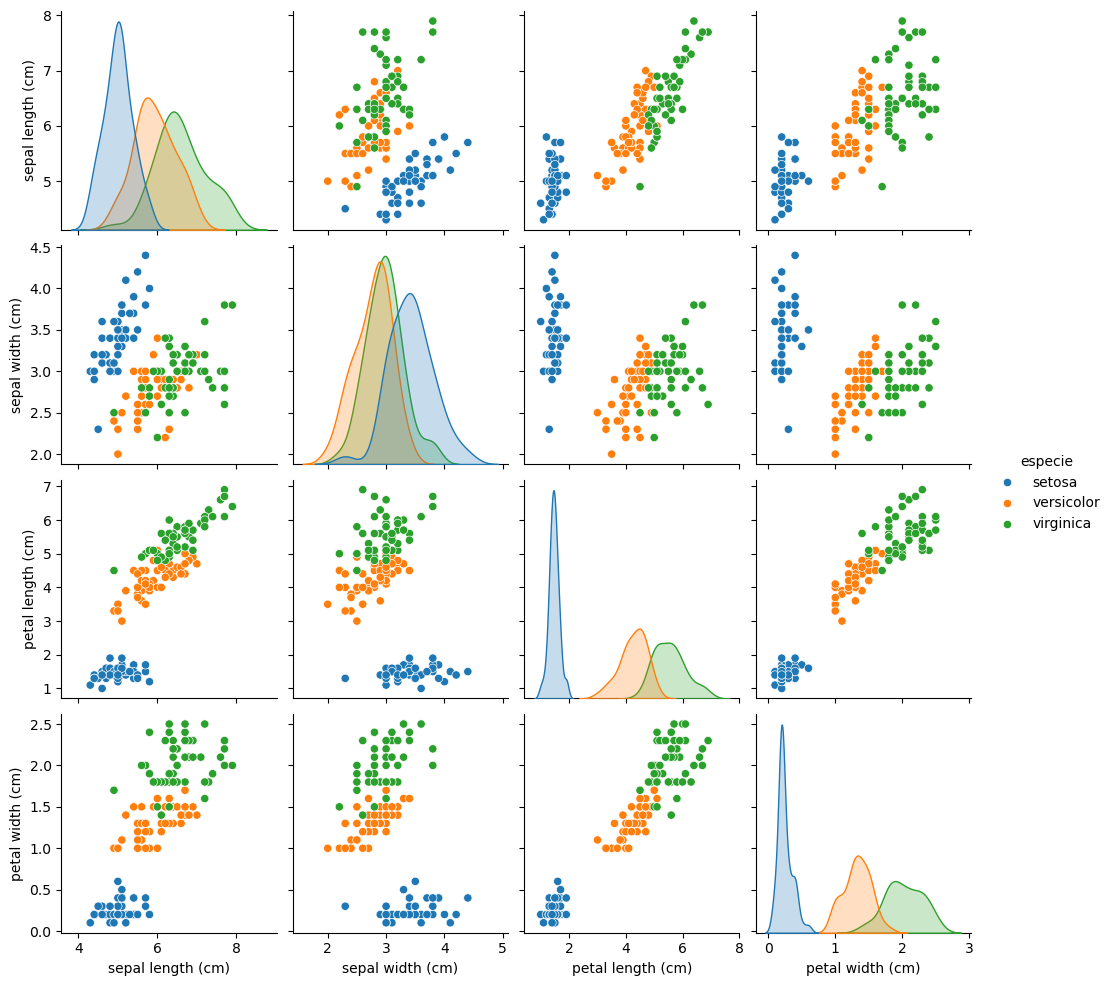

In [40]:
sns.pairplot(df,hue = 'especie');

Dispersão das especies pela largura e comprimento das pétalas

Estatisticas

In [41]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Distribuição dos dados para treinamento

In [42]:
dados = df.drop(['especie'], axis = 1)
respostas= df['especie']
dados_treino,dados_teste,resposta_treino,resposta_teste = train_test_split(dados, respostas, test_size=0.3)

Identação e treinamento das IAs

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
arvore = DecisionTreeClassifier()
knn.fit(dados_treino,resposta_treino)
arvore.fit(dados_treino,resposta_treino);

Previsões e avaliações das IAs

In [44]:
resposta_knn = knn.predict(dados_teste)
resposta_arvore = arvore.predict(dados_teste)

print(f"Acurácia knn:{accuracy_score(resposta_teste, resposta_knn):.3f}%")
print(f"matriz de confusão do knn:\n{confusion_matrix(resposta_teste,resposta_knn)}")
print(f"\nAcurácia árvore de decisões:{accuracy_score(resposta_teste, resposta_arvore):.3f}%")
print(f"matriz de confusão da árvore de decisões:\n{confusion_matrix(resposta_teste, resposta_arvore)}")


Acurácia knn:0.956%
matriz de confusão do knn:
[[12  0  0]
 [ 0 15  0]
 [ 0  2 16]]

Acurácia árvore de decisões:0.956%
matriz de confusão da árvore de decisões:
[[12  0  0]
 [ 0 15  0]
 [ 0  2 16]]


Mapeamento da arvore de decisões

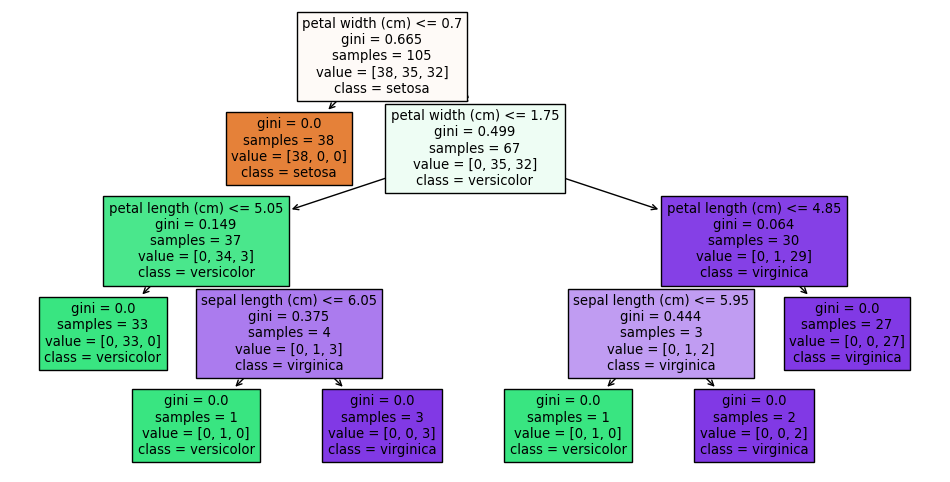

In [45]:
plt.figure(figsize=(12,6))
plot_tree(arvore, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True);
plt.show()